In [469]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [470]:
#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

today = datetime.now().strftime('%d-%m-%Y')

In [471]:
PRACTICE = 'All'
FOLDER = '/240418'

In [472]:
os.chdir(u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/'+PRACTICE+FOLDER)

In [473]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback/RS_FEEDBACK/All/240418'

In [474]:
first = True

for filename in os.listdir(os.getcwd()):
    df = pd.read_excel(filename, sheet_name=None)
    
    sheet_names = df.keys()
    sheets = sheet_names[4:-1]

    print filename

    entity_count = len(sheets)
    print("Entity count: {0:d}".format(entity_count))
    
    for sh in sheets:
        if sh == u'PII Data Record': #this is an odd bug!
            print "this is odd! PII Data"
            continue
        df[sh].insert(loc=0, column='Filename', value=filename)
        df[sh].drop(0, inplace=True)
        df[sh]['Response'].fillna('No Response', inplace=True)
        df[sh]['Remediation Project Ref'].fillna('No Response', inplace=True)
        df[sh]['Response Comments'].fillna('', inplace=True)
        df[sh]['Compliance Assessment'].fillna('N/A', inplace=True)
        if first:
            out_df = df[sh][['Filename','Req Ref',\
                             'Req nr',\
                             'Compliance Assessment',\
                             'Response',\
                             'Response Comments',\
                             'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            first = False
        else:
            cp_df = df[sh][['Filename','Req Ref',\
                            'Req nr',\
                            'Compliance Assessment',\
                            'Response',\
                            'Response Comments',\
                            'Remediation Project Ref']].copy()
            out_df['Entity Count'] = entity_count
            out_df = pd.concat([out_df, cp_df], axis=0, ignore_index=True, copy=True)

GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS054-Hosting Solution Management-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS024-Device Lifecycle Management-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS090-GDSP - NW-V4.0 RELEASED.xlsx
Entity count: 4
GDPR-RS-EPS021-VTR-V4.0 RELEASED.xlsx
Entity count: 4
GDPR-RS-EPS066-Process Tracker-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS129-Service Now-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS127-EDM (Enterprise Data Mart)-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS156-Dedicated Internet Access (Legacy)-V4.0 RELEASED.xlsx
Entity count: 4
GDPR-RS-EPS043-Private Cloud-V4.1 REVIEWED (25-04-2018).xlsx
Entity count: 1
GDPR-RS-EPS193a-OneNet Atos and Celfocus Clients-V4.0 RELEASED.xlsx
Entity count: 1
GDPR-RS-EPS070-NMR-V4.0 RELEASED.xlsx
Entity count: 2
GDPR-RS-EPS080-NI-S-Phase1-V4.0 RELEASED.xlsx
Entity count: 5
GDPR-RS-EPS063-eMail Protection-V4.1 REVIEWED (25-04-2018).xlsx
Entity count: 1
GDPR-RS-EPS109-SME SOHO-V

In [475]:
#out_df[out_df['Req Ref'].str.contains("EPS118-PCA-76V")]

#add product column
out_df['Product Ref'] = out_df['Req Ref'].str.slice(0, -2)

out_df['Product ID'] = out_df['Req Ref'].str.slice(3, 6)

out_df['Category'] = out_df['Req Ref'].str.slice(7, 10)

#out_df.drop_duplicates(['Product Ref'], keep='first', inplace=True)

mapping = {'No Response':'No Project Code'}

out_df['Orphan'] = out_df['Remediation Project Ref'].map(lambda x: mapping.get(x, 'Project Code Allocated'))

out_df[out_df['Product ID'] == '022'].head(50)
#out_df.head()

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan
7009,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-18H-A,18H,Acknowledged,New Req: Introduce a feature in the BYOX porta...,EPS022-PCA-18H,022,PCA,No Project Code
7010,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-18V-A,18V,Acknowledged,New Req: Introduce a feature in the BYOX porta...,EPS022-PCA-18V,022,PCA,No Project Code
7011,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-51V-A,51V,Acknowledged,"New Req: ""An end user who has left their compa...",EPS022-PCA-51V,022,PCA,No Project Code
7012,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-52H-A,52H,Acknowledged,"New Req: ""Add a super user feature to delete ...",EPS022-PCA-52H,022,PCA,No Project Code
7013,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-52V-A,52V,Acknowledged,"New Req: ""An end user who has left their compa...",EPS022-PCA-52V,022,PCA,No Project Code
7014,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-58H-A,58H,Acknowledged,,EPS022-PCA-58H,022,PCA,No Project Code
7015,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-63H-A,63H,Acknowledged,,EPS022-PCA-63H,022,PCA,No Project Code
7016,FULLY COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-69H-A,69H,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS022-PCA-69H,022,PCA,No Project Code
7017,FULLY COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-69V-A,69V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS022-PCA-69V,022,PCA,No Project Code
7018,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-2H-A,2H,Acknowledged,,EPS022-PCA-2H,022,PCA,No Project Code


In [476]:
p22 = out_df[out_df['Product ID'] == '022']

p22.head(20)

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan
7009,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-18H-A,18H,Acknowledged,New Req: Introduce a feature in the BYOX porta...,EPS022-PCA-18H,022,PCA,No Project Code
7010,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-18V-A,18V,Acknowledged,New Req: Introduce a feature in the BYOX porta...,EPS022-PCA-18V,022,PCA,No Project Code
7011,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-51V-A,51V,Acknowledged,"New Req: ""An end user who has left their compa...",EPS022-PCA-51V,022,PCA,No Project Code
7012,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-52H-A,52H,Acknowledged,"New Req: ""Add a super user feature to delete ...",EPS022-PCA-52H,022,PCA,No Project Code
7013,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-52V-A,52V,Acknowledged,"New Req: ""An end user who has left their compa...",EPS022-PCA-52V,022,PCA,No Project Code
7014,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-58H-A,58H,Acknowledged,,EPS022-PCA-58H,022,PCA,No Project Code
7015,NON-COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-63H-A,63H,Acknowledged,,EPS022-PCA-63H,022,PCA,No Project Code
7016,FULLY COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-69H-A,69H,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS022-PCA-69H,022,PCA,No Project Code
7017,FULLY COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-69V-A,69V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS022-PCA-69V,022,PCA,No Project Code
7018,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS022-BYOx-V4.0 RELEASED.xlsx,No Response,EPS022-PCA-2H-A,2H,Acknowledged,,EPS022-PCA-2H,022,PCA,No Project Code


In [477]:
output_writer = pd.ExcelWriter('../'+PRACTICE+'-REMEDIATION-STATS-'+today+'.xlsx')
out_df.to_excel(output_writer, 'REMEDIATION STATS')
output_writer.save()

Text(0.5,1,u'Chart to show all requirements and their response types: All 27-04-2018')

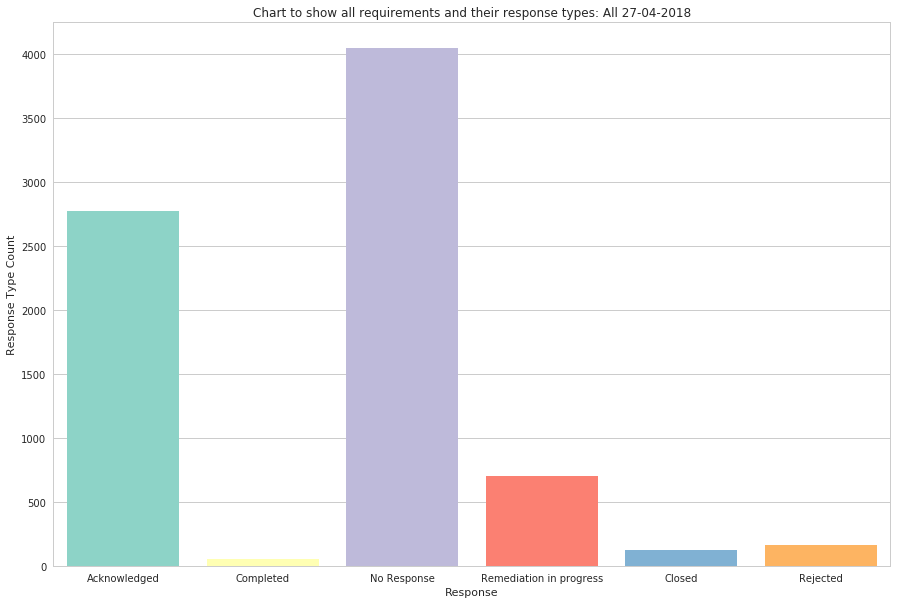

In [478]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Response', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all requirements and their response types: "+PRACTICE+" "+today)

In [479]:
fig.savefig("../"+PRACTICE+"_fig.png")

Text(0.5,1,u'Chart to show projects that do not have a project code assigned: All 27-04-2018')

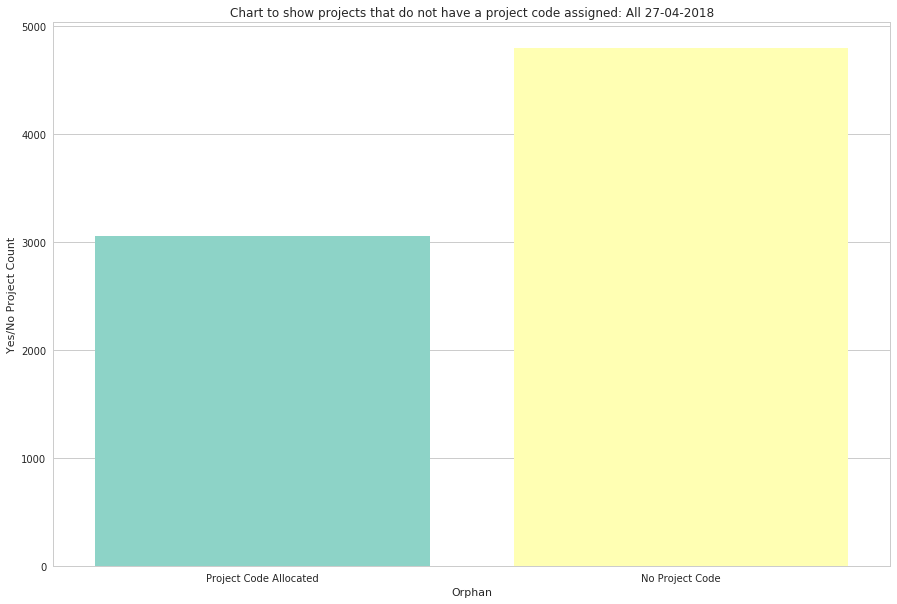

In [480]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=out_df, ax=ax, x='Orphan', saturation=1, palette='Set3')
ax.set_ylabel("Yes/No Project Count")
ax.set_title("Chart to show projects that do not have a project code assigned: "+PRACTICE+" "+today)

In [481]:
fig.savefig("../"+PRACTICE+"_project_codes_fig.png")
out_df.head()

,Compliance Assessment,Entity Count,Filename,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Product ID,Category,Orphan
0,NON-COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-4H,EPS097-PCA-4H-A,4H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-4H,097,PCA,Project Code Allocated
1,NON-COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-73H,EPS097-PCA-73H-A,73H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-73H,097,PCA,Project Code Allocated
2,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-5H,EPS097-PCA-5H-A,5H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-5H,097,PCA,Project Code Allocated
3,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,GE-PCA-11H,EPS097-PCA-11H-A,11H,Acknowledged,Acknowledged as horizontal,EPS097-PCA-11H,097,PCA,Project Code Allocated
4,PARTIALLY COMPLIANT,1.0,GDPR-RS-EPS097-AEP IEP-V4.0 RELEASED.xlsx,No Response,EPS097-PCA-11V-A,11V,Completed,Fully Compliant,EPS097-PCA-11V,097,PCA,No Project Code


In [482]:
out_df['Orphan'].value_counts()

No Project Code           4798
Project Code Allocated    3056
Name: Orphan, dtype: int64

In [483]:
#pd.get_dummies(out_df['Response'])
out_df['Response'].value_counts()

No Response                4044
Acknowledged               2773
Remediation in progress     698
Rejected                    161
Closed                      126
Completed                    52
Name: Response, dtype: int64

In [484]:
COLUMNS = {'PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC'}

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

req_content = ['']
vertical = [15, ]

uc_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)


In [485]:
uc_risk_df

,PRIVACY_REQUIREMENT_CONTENT,VERTICAL,NC,HYBRID,PC,REQ_NO,HORIZONTAL
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN
J,NaN,NaN,NaN,NaN,NaN,NaN,NaN
